In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV


<font  style="font-size: 4rem; color: #1abc9c"> SVM </font>

# <font color="#1E90FF">Exercise 1. Linear SVM - Influence of hyper-parameter C</font>

## <font color="#9400D3">1. Load, analyze and visualize data</font>

Warning: in this particular exercise, we will not split the dataset in train/val/test.

In [4]:
dataset = pd.read_csv('./data/LineaireNoisy.txt', delimiter='\t')
dataset

,x1,x2,y
0,9.50,10.00,0
1,14.25,16.55,1
2,10.00,5.00,1
3,2.30,5.25,0
4,3.40,3.88,0
...,...,...,...
147,15.01,15.67,1
148,16.05,14.70,1
149,15.65,18.23,1
150,18.85,17.43,1


<font color="red">**Question 1:**</font> 
- How many examples $\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(2)},...\boldsymbol{x}^{(n)}$ in the dataset?
- How many features $x_1, x_2,...x_d$ ? What are their types? Their distribution?
- What are the classes?
- What is the class distribution over the dataset?

In [5]:
dataset.y.value_counts()

y
0    76
1    76
Name: count, dtype: int64

### Plotting the dataset

<Axes: xlabel='x1', ylabel='x2'>

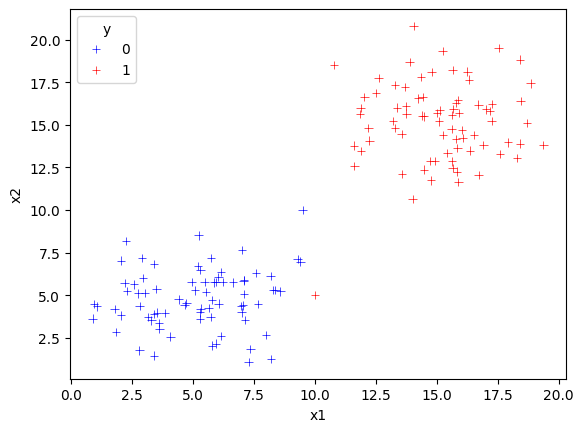

In [6]:
sns.scatterplot(data=dataset, x='x1', y='x2', hue='y', marker='+', palette=['blue','red'])


<font color="red">**Question 2:**</font>  Is this dataset linearly separable ? Find some examples that are close to the boundary

## <font color="#9400D3">2. Fitting a linear SVM to this dataset</font>

One implementation of SVM is done by class <code>SVC</code>, which stands for Support Vector Classification.
Documentation is available: 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [7]:
# SVC with linear kernel, and parameter C set to 1000
model_svm = svm.SVC(C = 1000, kernel = 'linear')

# Fit the model using the features (x1 and x2) and the target (y)
model_svm.fit(dataset.iloc[:,0:2], dataset.y)

SVC(C=1000, kernel='linear')

### Visualizing the SVM model

Run the following cells to see a plot of your dataset together with the decision boundary and the margins.

In [8]:
def svm_draw(model_svm, xmin, xmax, dataset):
    
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))


    plt.figure(figsize=(10, 8))
    # Plotting our two-features-space
    plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = dataset.y, cmap = color_map, marker='+')
    # Constructing a hyperplane using a formula.
    w = model_svm.coef_[0]           # w consists of 2 elements
    b = model_svm.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(xmin, xmax)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

    plt.plot(x_points, y_points, c='g');

    plt.scatter(model_svm.support_vectors_[:, 0],
                model_svm.support_vectors_[:, 1], 
                s=50, 
                facecolors='none', 
                edgecolors='k', 
                alpha=1);

    # Step 2 (unit-vector):
    w_hat = model_svm.coef_[0] / (np.sqrt(np.sum(model_svm.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(model_svm.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
             points_of_line_above[:, 1], 
             'g--', 
             linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
             points_of_line_below[:, 1], 
             'g--',
             linewidth=2)

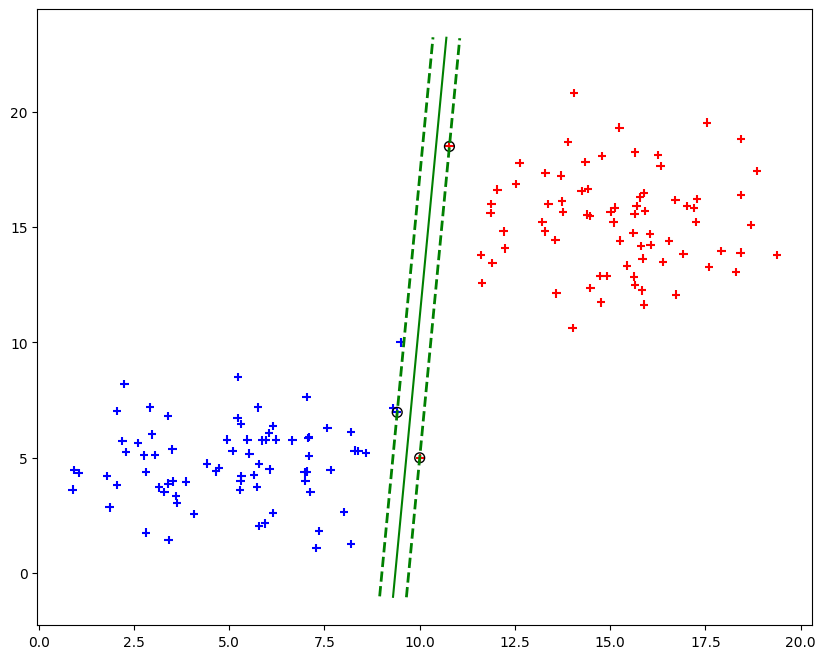

In [9]:
svm_draw(model_svm, 9.3, 10.7, dataset)

<font color="red">**Question 3:**</font>  
- What do you think of this boundary and these margins?
- How many points are inside the margins?
- How many points are misclassified by this model?

### SVM model analysis

We can also retrieve more precise information about the model that will allow us to understand its decision process.

Course reminder: when fitting a SVM model, a Lagrange coefficient is associated to each sample. In addition, one more parameter is also estimated: the constant of the model.

We can find these informations by the following commands:

In [10]:
model_svm.support_vectors_
# the support vectors found by the SVC

array([[ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

In [11]:
model_svm.support_
# the index of the support vectors in the dataset

array([ 62,   2, 102], dtype=int32)

In [12]:
model_svm.dual_coef_
# the lagrange coefficients associated to the support vectors (alpha_i) multiplied by their targets (y_i)

array([[-4.04838982,  3.46935572,  0.5790341 ]])

In [13]:
model_svm.intercept_
# the constant of the model (w0)

array([-26.58177221])

<font color="red">**Question 4:**</font>  
- How many support vectors?
- What are the classes $y_i$ associated to each support vector?
- What are lagrange coefficients $\alpha_i$ associated to each support vector?

Be carefull: 'dual_coef_' returns the lagrange coefficients associated to the support vectors **multiplied by their targets** 

<font color="red">**Question 5:**</font> 
Deduce the equation $h_w(x)$ of this model. 

### Classification with SVM model

<font color="blue">**todo:**</font> Apply the previous formula to compute the decisions $\hat{y}$ for the 2 first examples of the dataset. 

Hints: dot product between 2 vectors $x_1$ and $x_2$ is done by <code>np.dot(x_1, x_2)</code>.

<font color="red">**Question 6:**</font> 
- What represents the value $h_w(x)$?
- Are these examples correctly classified?

In [14]:
# TODO


You can obtain the $h_w(x)$ values for the examples in the dataset using the function 
<code>decision_function</code>.

Check your results.

In [15]:
print(model_svm.decision_function(dataset.iloc[:2,0:2]))
print('\n',dataset.iloc[:2,:])

[-1.24148389 11.17421548]

       x1     x2  y
0   9.50  10.00  0
1  14.25  16.55  1


<font color="red">**Question 6:**</font> what are the decision values for the support vectors? Which values are expected for support vectors? 

In [16]:
# TODO: print the decision values for the support vectors


## <font color="#9400D3">3. Change the hyperparameter C</font>

Even if the dataset is linearly separable, the previous boundary is not very adapted. Because C is very high the model favours no training error. 

<font color="blue">**Todo:**</font> 
- Fit a model with a smaller value of C: C = 1
- Plot the new boundary and margins

<font color="red">**Question 7:**</font> 
 - How many support vectors are selected ?
 - How many points are inside the margins ? on the margins ?
 - How many points from the dataset are misclassified ?
 - What are the lagrange values of $\alpha$ for the support vectors ?
 - What are the values of $h_w(x)$ for the support vectors ?


In [17]:
# TODO - Fit a SVM model with C=1 



In [18]:
# TODO - Visualize boundary and margins

<font color="red">**Question 8:**</font>  Same questions for C = 0.01.

hint: you'll have to modify xmin and xmax in the <code>svm_draw</code> function to 3 and 17

In [19]:
# TODO - Fit a SVM with C=0.01


<font color="red">**Question 9:**</font>  what can you conclude about the influence of C ?

# <font color="#1E90FF">Exercise 2: Choosing C using train/val/test split</font>


In this exercise, you will choose the best value of C (for a given dataset) by the same procedure as for the other algorithms: train/validation/test split

In [20]:
# Load the dataset
dataset = pd.read_csv("./data/spam7.csv", decimal=",", index_col=0, delimiter = ";")
dataset
# A description about this dataset is given here:
# https://rdrr.io/cran/DAAG/man/spam7.html

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


<font color="red">**Question 1:**</font>  How many examples ? How many features ? What is the distribution of the target ?

In [21]:
# TODO - dataset analysis


SVM can be very long to fit when the dataset is big (number of examples, number of features).
It is better to scale the features before fitting a model. A classical scaling is the standard scaler, which removes the mean and divide by the standard deviation. Hence, after this operation, each feature has a mean of zero and a standard deviation of 1. 

In [22]:
from sklearn.preprocessing import StandardScaler
# First, get the features
X = dataset.iloc[:,0:6]
# then create a scaler on X
scaler = StandardScaler().fit(X)
# Apply it to X
X = scaler.transform(X)
# create a dataframe with X
X = pd.DataFrame(X, columns=dataset.columns[0:6])
X.describe()

# You should see that the features have been transformed
# print(X.dollar.mean())
# the mean of feature 'dollar' is now 0 (very close to 0)
# it is the same for the other features

,crl.tot,dollar,bang,money,n000,make
count,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4601.000000,4.601000e+03
mean,2.470916e-17,-2.470916e-17,0.000000,-2.470916e-17,0.000000,1.853187e-17
std,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109,1.000109e+00
min,-4.656073e-01,-3.083549e-01,-0.329912,-2.129944e-01,-0.290209,-3.424337e-01
25%,-4.095278e-01,-3.083549e-01,-0.329912,-2.129944e-01,-0.290209,-3.424337e-01
50%,-3.105639e-01,-3.083549e-01,-0.329912,-2.129944e-01,-0.290209,-3.424337e-01
75%,-2.851691e-02,-9.684841e-02,0.056314,-2.129944e-01,-0.290209,-3.424337e-01
max,2.566085e+01,2.410845e+01,39.491909,2.803001e+01,15.270178,1.452700e+01


In [23]:
# Now we will add the target variable inside X
X['yesno'] = dataset.yesno
X
# now our dataset is called X

,crl.tot,dollar,bang,money,n000,make,yesno
0,-0.008724,-0.308355,0.624007,-0.212994,-0.290209,-0.342434,y
1,1.228324,0.423783,0.126203,0.758565,0.937491,0.345359,y
2,3.258733,0.440053,0.008496,-0.077428,3.021726,-0.145921,y
3,-0.152222,-0.308355,-0.161934,-0.212994,-0.290209,-0.342434,y
4,-0.152222,-0.308355,-0.164387,-0.212994,-0.290209,-0.342434,y
...,...,...,...,...,...,...,...
4596,-0.322110,-0.308355,-0.329912,-0.212994,-0.290209,0.672880,n
4597,-0.444165,-0.308355,0.102907,-0.212994,-0.290209,-0.342434,n
4598,-0.272628,-0.308355,-0.329912,-0.212994,-0.290209,0.640128,n
4599,-0.338604,-0.308355,-0.329912,-0.212994,-0.290209,2.801763,n


<font color="blue">todo:</font>  Split this dataset into training/validation/test 

In [24]:
# TODO - train/validation/test splitting


<font color="red">**Question 2:**</font> 
 - Fit a first linear SVM model with C = 1
 - How many support vectors are selected ?
 - What is the performance of this model on the training set ? on the test set ?
 - What is the confusion matrix of the predictions of the test set ? What kind of errors is more often made? (check <code>confusion_matrix</code> function for that)

In [25]:
# TODO - Fit a linear SVM model with C = 1


<font color="blue">**Todo:**</font>  
- Try different values of C (between 0.01 and 1000 for instance, by order of magnitude) and compute the training and validation scores for each value of C (use a'for' loop). 
- Select the best value of C and estimate the generalization error of the selected SVM.

In [26]:
# TODO - this can take some computing time


In [27]:
# TODO - estimate the generalization error of the selected SVM

<font color="red">**Question 3:**</font> 
- give the best C value
- compare the generalization error using this tuned value and the default value (C=1)

# <font color="#1E90FF">Exercise 3: Non-linear SVM</font>

We move here on SVM using kernel functions.

## <font color="#9400D3">1. Data analysis</font>

In [28]:
# Load a dataset
dataset = pd.read_csv("./data/SepNonLineaire.csv")
dataset

,x1,x2,y
0,1.5,4.0,1
1,1.0,2.0,1
2,0.0,0.0,1
3,1.0,4.0,1
4,0.5,3.0,1
...,...,...,...
145,-2.8,-3.3,0
146,-2.8,1.0,0
147,-2.8,3.0,0
148,-2.4,3.0,0


<font color="red">**Question 1:**</font> How many examples? features? distribution of the target values ?

In [29]:
print(dataset.y.value_counts())
dataset.describe()

y
0    105
1     45
Name: count, dtype: int64


,x1,x2,y
count,150.000000,150.000000,150.000000
mean,0.552000,0.870667,0.300000
std,1.923738,3.842845,0.459793
min,-2.800000,-5.000000,0.000000
25%,-1.000000,-3.000000,0.000000
50%,0.600000,1.000000,0.000000
75%,2.375000,4.000000,1.000000
max,4.000000,8.200000,1.000000


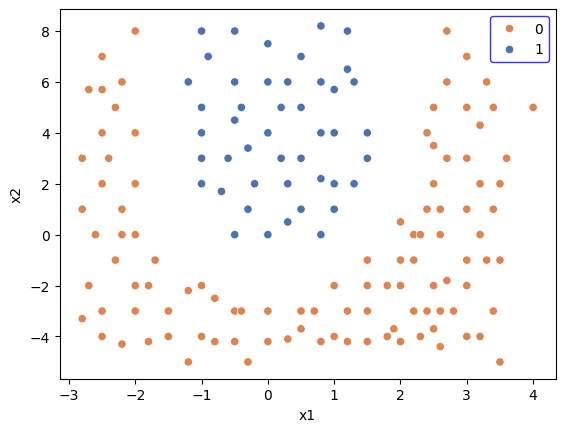

In [30]:
sns.scatterplot(data=dataset, x='x1', y='x2', hue='y', palette=sns.color_palette("deep")[0:2][::-1])
legend = plt.legend(frameon=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('b')

<font color="red">**Question 2:**</font> Is this dataset linearly separable ?

In [31]:
# TODO - Split this dataset into training/validation/test


## <font color="#9400D3">2. Linear SVM</font>

<font color="blue">**Todo:**</font> try a linear SVM, compute the real error, and draw the boundaries, just to see.

In [32]:
# TODO - linear SVM



In [33]:
# TODO - draw the boundaries

## <font color="#9400D3">3. Radial SVM</font>

We will apply a radial SVM (with rbf kernel).
For this, you just need to specify <code>kernel = 'rbf'</code> rather than <code>kernel = 'linear'</code>.
And you'll also need to set a value for gamma (otherwise there is a default value)

<font color="blue">**Todo:**</font> 
 - Fit a rbf SVM with C = 1 and gamma = 10
 - Compute train and validation scores
 - Plot the decision boundaries and the margins using the function <code>draw_boundary</code> above
 
<font color="red">**Question 3:**</font> 
What phenomenon can you observe here ?

In [34]:
# TODO - Fit a radial SVM


In [35]:
def draw_boundary(model, data, x_min, x_max, y_min, y_max):
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)
    

In [36]:
draw_boundary(model_svm, train_set, -3,4,-5,9)

NameError: name 'train_set' is not defined

<font color="blue">**Todo:**</font>
- Try now to modify C and gamma to have a better decision boundary
- Choose the best values of C and gamma 
- Estimate the generalization error of this SVM
- draw the boundaries

In [ ]:
# TODO - search for best C and gamma values using validation set


In [ ]:
# TODO - generalization error estimation

In [ ]:
# TODO - draw the boundaries

<font color="blue">**Todo:**</font> You can also try polynomial kernels by specifying <code>kernel = 'poly'</code>. You'll have to tune the parameter <code>'degree'</code> with this kernel.

Note that in SVC, polynomial kernel is defined as: $$ K(x,x')=(\gamma (x.x') + r)^d$$ where $d$ is specified by parameter <code>degree</code>, r by <code>coef0</code> (default=0.0).

In [ ]:
# TODO - Fit a polynomial kernel. Find the best C and degree using validation set


<font color="red">**Question 4:**</font> 
- Which are finally the best hyper-parameters?
- Evaluate the final model on the test set.

## <font color="#9400D3">4. Expert mode</font>

When tuning the hyper-parameters with a validation set, rather than using several 'for', scikit learn offers a <code>GridSearchCV(estimator, param_grid)</code> function : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

The parameters of the estimator (classifier) are optimized by **cross-validated** grid-search over a parameter grid. Candidates are exhaustively generated from a grid of parameter values specified with the <code>param_grid</code> parameter.

In [ ]:
param_grid = [
              {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4], 'kernel': ['poly']},
              {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1.0], 'kernel': ['rbf']},
              ]
print("\n # Tuning hyper-parameters")
clf = GridSearchCV(svm.SVC(), param_grid, cv=5)
clf.fit(train_set.iloc[:,:2], train_set.y)


print("Best parameters set found on training set:")
print(clf.best_params_)

y_pred = clf.predict(test_set.iloc[:,:2])
print("\n SVM on test set (parameter tuning) : \t", accuracy_score(test_set.y, y_pred), "\n")


<font color="red">**Question 5:**</font> 
- Explain how many learning are done in the above procedure.
- How the (hyper)-parameter are selected?
- Does that match your previous study?